<a href="https://colab.research.google.com/github/jennychen0223/Mnist_models/blob/main/Mnist_MLP_units_256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
#!pip install np_utils


In [ ]:
 (train_feature, train_label),(test_feature, test_label) = mnist.load_data()

In [ ]:
print('train訓練資料：%8d筆' % len(train_feature))
print('test訓練資料：%8d筆' % len(train_label))

print('train_feature：', train_feature.shape)
print('train_label：', train_label.shape)


train訓練資料：   60000筆
test訓練資料：   60000筆
train_feature： (60000, 28, 28)
train_label： (60000,)


In [ ]:
def show_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2,2) #數字圖片大小
  plt.imshow(image, cmap='binary') #顯示黑白灰階
  plt.show()

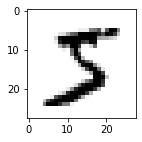

In [ ]:
show_image(train_feature[0])

In [ ]:
print(train_label[0])

5


In [ ]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)
  if num>25: num=25

  for i in range(0, num):
    ax = plt.subplot(5,5,i+1)
    #顯示黑白圖片
    ax.imshow(images[start_id], cmap = 'binary')
    title = 'label =' + str(labels[start_id])

    #有預測結果資料，才顯示結果
    if (len(predictions) > 0):
      title += ' ,predict =' + str(predictions[start_id])
    ax.set_title(title, fontsize=12)
    ax.set_xticks([]); ax.set_yticks([])
    start_id += 1
  plt.show()

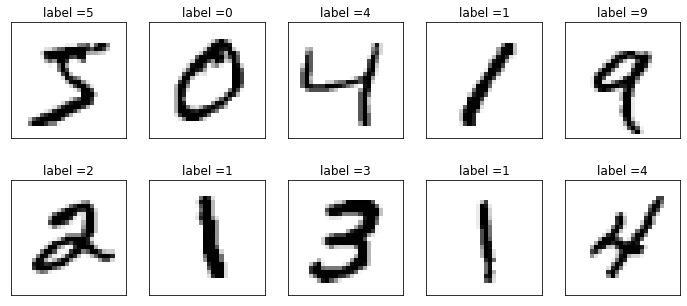

In [ ]:
show_images_labels_predictions(train_feature, train_label, [], 0, 10)

Feature 資料預處理

In [ ]:
train_feature_vector = train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')

In [ ]:
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [ ]:
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

標準化

In [ ]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Label資料預處理

In [ ]:
print(train_label[0:5])

[5 0 4 1 9]


In [ ]:
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


建模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 256,
                input_dim = 784,
                kernel_initializer = 'normal',
                activation = 'relu'))

In [ ]:
model.add(Dense(units = 10,
                kernel_initializer = 'normal',
                activation = 'softmax'))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 200,
                          verbose = 2)

Epoch 1/10
240/240 - 2s - loss: 0.4366 - accuracy: 0.8830 - val_loss: 0.2234 - val_accuracy: 0.9379
Epoch 2/10
240/240 - 2s - loss: 0.1915 - accuracy: 0.9458 - val_loss: 0.1560 - val_accuracy: 0.9566
Epoch 3/10
240/240 - 1s - loss: 0.1356 - accuracy: 0.9612 - val_loss: 0.1336 - val_accuracy: 0.9613
Epoch 4/10
240/240 - 1s - loss: 0.1047 - accuracy: 0.9697 - val_loss: 0.1124 - val_accuracy: 0.9682
Epoch 5/10
240/240 - 2s - loss: 0.0833 - accuracy: 0.9767 - val_loss: 0.1026 - val_accuracy: 0.9707
Epoch 6/10
240/240 - 2s - loss: 0.0669 - accuracy: 0.9811 - val_loss: 0.0960 - val_accuracy: 0.9707
Epoch 7/10
240/240 - 1s - loss: 0.0558 - accuracy: 0.9841 - val_loss: 0.0883 - val_accuracy: 0.9731
Epoch 8/10
240/240 - 1s - loss: 0.0460 - accuracy: 0.9875 - val_loss: 0.0879 - val_accuracy: 0.9745
Epoch 9/10
240/240 - 2s - loss: 0.0385 - accuracy: 0.9898 - val_loss: 0.0812 - val_accuracy: 0.9752
Epoch 10/10
240/240 - 2s - loss: 0.0321 - accuracy: 0.9921 - val_loss: 0.0845 - val_accuracy: 0.9750

In [ ]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show


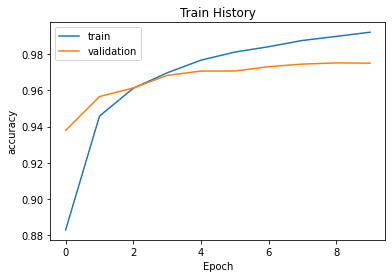

In [ ]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

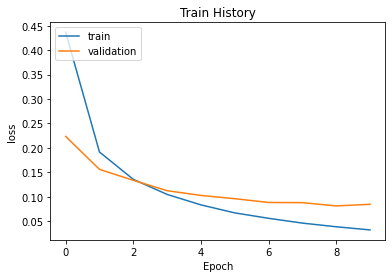

In [ ]:
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n 準確率=', scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9763

 準確率= 0.9763000011444092


進行預測

In [ ]:
prediction = model.predict_classes(test_feature_normalize)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


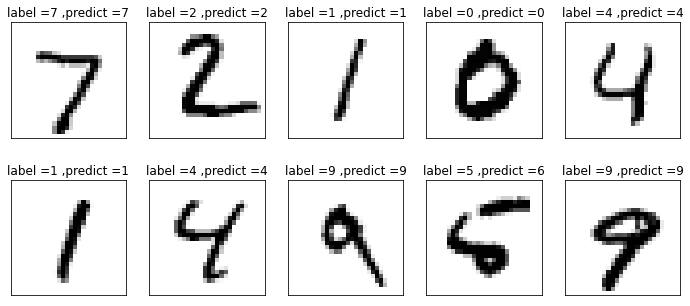

In [ ]:
show_images_labels_predictions(test_feature, test_label, prediction, 0)

混淆矩陣

In [ ]:
pd.crosstab(test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,0,1,1,2,1,1,1,1
1,0,1125,3,1,0,1,2,1,2,0
2,9,2,992,9,2,0,3,6,9,0
3,1,0,0,997,0,2,0,4,2,4
4,2,0,0,1,968,0,3,1,0,7
5,3,0,0,11,1,860,7,1,4,5
6,8,2,0,1,4,3,940,0,0,0
7,1,5,6,4,1,0,0,1006,1,4
8,7,0,3,18,3,7,2,4,926,4


In [ ]:
df = pd.DataFrame({'label':test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [ ]:
df[(df.label==5) & (df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
3702,5,3
4271,5,3
4360,5,3
5937,5,3
5972,5,3


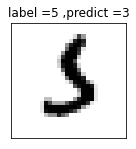

In [ ]:
show_images_labels_predictions(test_feature, test_label, prediction, start_id=340, num=1)